# Import Libraries 

In [1]:
import psutil,os,time
import matplotlib.pyplot as plt
import numpy as np

# System Monitoring

## Ram

In [2]:
def get_ram_usage():
    return psutil.virtual_memory().percent

## CPU

In [3]:
def get_cpu_usage():
    return psutil._percent(interval=1)

## Processes

In [4]:
def get_process_data():
    # return all processes with there pid, name, ram usage, memory usage, status, and create time in a dictionary
    process_data={}
    for proc in psutil.process_iter(['pid', 'name', 'ram_percent', 'memory_percent', 'status', 'create_time']):
        process_data[proc.info['pid']] = proc.info
    return process_data

## Get the data

In [5]:
for i in range(10):
    print(f"CPU Usage: {get_ram_usage()}%")
    print(f"RAM Usage: {get_ram_usage()}%")
    print(get_process_data())
    time.sleep(1)

CPU Usage: 7.0%
RAM Usage: 76.7%
{1: {'pid': 1, 'create_time': 1719986555.83, 'cpu_percent': 0.0, 'memory_percent': 0.2888550514222697, 'name': 'systemd', 'status': 'sleeping'}, 2: {'pid': 2, 'create_time': 1719986555.92, 'cpu_percent': 0.0, 'memory_percent': 0.03531012712657517, 'name': 'init-systemd(Ub', 'status': 'sleeping'}, 7: {'pid': 7, 'create_time': 1719986556.91, 'cpu_percent': 0.0, 'memory_percent': 0.003439955078233684, 'name': 'init', 'status': 'sleeping'}, 51: {'pid': 51, 'create_time': 1719986558.05, 'cpu_percent': 0.0, 'memory_percent': 0.33994850184897585, 'name': 'systemd-journald', 'status': 'sleeping'}, 74: {'pid': 74, 'create_time': 1719986558.48, 'cpu_percent': 0.0, 'memory_percent': 0.14528751448069324, 'name': 'systemd-udevd', 'status': 'sleeping'}, 90: {'pid': 90, 'create_time': 1719986558.64, 'cpu_percent': 0.0, 'memory_percent': 0.004654056870551455, 'name': 'snapfuse', 'status': 'sleeping'}, 92: {'pid': 92, 'create_time': 1719986558.66, 'cpu_percent': 0.0, 'm

## save the data

In [2]:
import json

In [20]:

for i in range(1000):
    data={
        "cpu": get_cpu_usage(),
        "ram": get_ram_usage(),
        "processes": get_process_data()
    }
    with open("data.json", "a") as f:
        f.write(json.dumps(data))
        f.write("\n")
    time.sleep(3)

It will take approximately 10.0 minutes to get 10000 samples.
Time per sample: 0.06 seconds


KeyboardInterrupt: 

In [3]:
cpu_data=[]
ram_data=[]
with open('data.json', 'r') as file:
    for line in file:
        data=json.loads(line)
        cpu_data.append(data['cpu'])
        ram_data.append(data['ram'])
print(cpu_data)
print(ram_data)

[2.7, 1.7, 59.9, 3.7, 33.7, 0.5, 5.7, 5.3, 5.8, 68.5, 38.7, 62.2, 1.8, 1.5, 37.7, 88.8, 83.9, 83.6, 94.6, 92.6, 62.7, 54.6, 68.3, 52.7, 56.0, 69.7, 75.4, 97.0, 65.9, 57.9, 98.2, 89.0, 80.4, 83.2, 99.7, 62.6, 56.4, 56.4, 97.0, 60.5, 62.3, 93.6, 19.7, 91.5, 87.1, 66.1, 0.7, 42.1, 0.8, 9.0, 95.2, 62.9, 37.3, 52.1, 63.6, 40.3, 39.8, 52.4, 26.3, 8.1, 43.9, 56.8, 61.2, 70.4, 71.3, 66.8, 55.9, 65.0, 53.6, 46.2, 57.8, 73.1, 36.5, 25.6, 92.5, 62.7, 40.0, 39.9, 27.6, 11.8, 27.8, 28.4, 16.0, 67.5, 57.8, 59.3, 55.6, 61.2, 49.0, 49.2, 26.8, 52.9, 56.9, 12.2, 4.2, 32.4, 9.0, 6.2, 28.4, 19.9, 16.5, 65.2, 48.1, 15.4, 10.8, 12.2, 8.2, 4.0, 2.5, 15.4, 40.1, 24.4, 62.0, 13.2, 17.9, 20.8, 29.0, 10.6, 29.9, 59.9, 58.1, 49.2, 58.3, 65.8, 58.5, 61.1, 64.4, 38.3, 39.2, 39.0, 9.5, 41.0, 15.7, 39.4, 15.8, 8.1, 39.4, 68.4, 47.1, 41.7, 64.5, 49.5, 62.2, 56.8, 60.7, 59.1, 62.9, 60.3, 68.4, 40.7, 68.6, 54.1, 51.5, 37.4, 33.2, 36.3, 36.9, 37.0, 38.2, 32.1, 33.4, 33.0, 32.6, 43.5, 38.7, 66.8, 34.6, 34.2, 41.0, 50.6, 

# Plot CPU and RAM

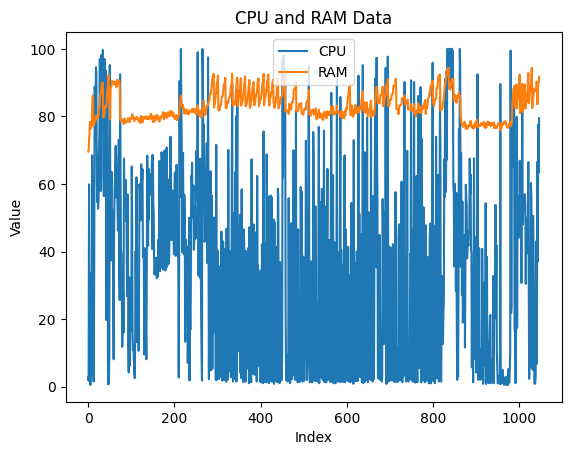

In [4]:

fig, ax = plt.subplots()
ax.plot(cpu_data, label='CPU')
ax.plot(ram_data, label='RAM')
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title('CPU and RAM Data')
ax.legend()
plt.show()


CPU Mean: 33.487010506208215
CPU Std: 28.082876109908582


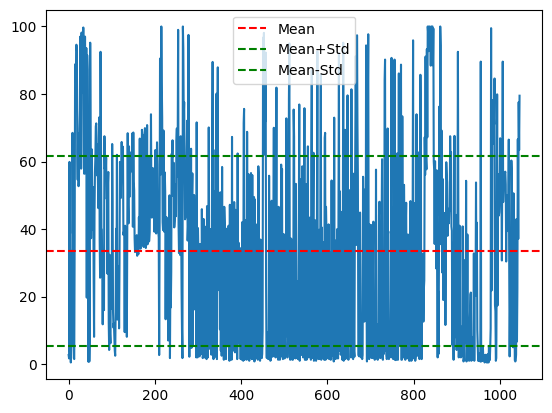

In [5]:
# plot std of cpu
cpu_data=np.array(cpu_data)
cpu_std=cpu_data.std()
cpu_mean=cpu_data.mean()
print(f"CPU Mean: {cpu_mean}")
print(f"CPU Std: {cpu_std}")
plt.plot(cpu_data)
plt.axhline(cpu_mean, color='r', linestyle='--', label='Mean')
plt.axhline(cpu_mean+cpu_std, color='g', linestyle='--', label='Mean+Std')
plt.axhline(cpu_mean-cpu_std, color='g', linestyle='--', label='Mean-Std')
plt.legend()
plt.show()

RAM Mean: 83.06867239732568
RAM Std: 4.151011942609996


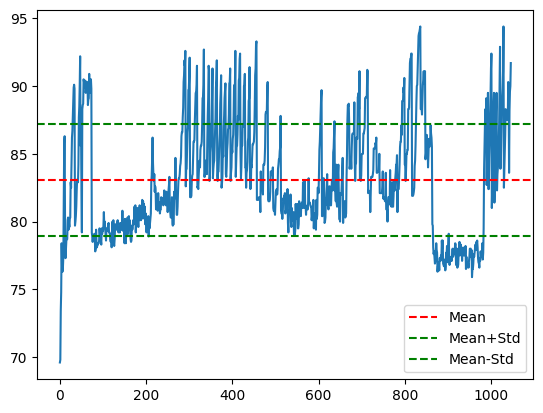

In [24]:
# plot ram std
ram_data=np.array(ram_data)
ram_std=ram_data.std()
ram_mean=ram_data.mean()
print(f"RAM Mean: {ram_mean}")
print(f"RAM Std: {ram_std}")
plt.plot(ram_data)
plt.axhline(ram_mean, color='r', linestyle='--', label='Mean')
plt.axhline(ram_mean+ram_std, color='g', linestyle='--', label='Mean+Std')
plt.axhline(ram_mean-ram_std, color='g', linestyle='--', label='Mean-Std')
plt.legend()
plt.show()

# Z score 

In [6]:
def z_score(data, k):
        mean = np.mean(data)
        std = np.std(data)
        z_scores = (data - mean) / std
        anomalies = np.where(np.abs(z_scores) > k)[0] 
        return anomalies

In [7]:
print(z_score(cpu_data,3))
print(z_score(ram_data,3))


[]
[0 1]


# Check for the Process due to which anoaly occured 

In [46]:
process = []
with open('data.json', 'r') as file:
    for line in file:
        data = json.loads(line)
        process.append(data['processes'])

cpu = z_score(cpu_data, 3)
ram = z_score(ram_data, 3)


In [48]:

reported_processes_ram = set()
reported_processes_cpu = set()

def check_and_report_anomaly(index, anomaly_type, reported_set):
    x = []
    process_keys = list(process[index].keys())
    for j in process_keys:
        if anomaly_type == 'RAM':
            x.append(process[index][j]['memory_percent'])
        elif anomaly_type == 'CPU':
            x.append(process[index][j]['cpu_percent'])
    max_index = np.argmax(np.array(x))
    max_process_key = process_keys[max_index]
    
    if max_process_key not in reported_set:
        print(f"{anomaly_type} Anomaly: {process[index][max_process_key]}")
        reported_set.add(max_process_key)

for i in ram:
    check_and_report_anomaly(i, 'RAM', reported_processes_ram)

for i in cpu:
    check_and_report_anomaly(i, 'CPU', reported_processes_cpu)

RAM Anomaly: {'pid': 1409, 'create_time': 1719986734.85, 'cpu_percent': 6.9, 'memory_percent': 19.117752697582418, 'name': 'node', 'status': 'sleeping'}


## Isolation Forests

In [15]:
from sklearn.ensemble import IsolationForest

def isolation_forest_anomalies(data, contamination=0.01):
    clf = IsolationForest(contamination=contamination, random_state=42)
    clf.fit(data.reshape(-1, 1))
    anomalies = np.where(clf.predict(data.reshape(-1, 1)) == -1)[0]
    return anomalies

In [16]:
print(isolation_forest_anomalies(ram_data))
print(isolation_forest_anomalies(cpu_data))

[   0    1    2    3    5    6    7   30   31   34   44   45   47   49
   53   54   55   56   59   60   63   64   65   66   68   69   70   71
   72   73  285  286  287  288  289  290  291  298  299  300  301  313
  314  315  316  318  330  334  343  345  346  351  352  354  361  363
  364  372  373  374  381  383  384  390  391  392  393  394  395  403
  407  413  414  415  416  417  418  425  429  438  440  452  453  454
  455  456  477  478  479  480  482  512  607  637  667  668  669  670
  671  683  693  695  707  712  713  714  794  795  796  798  799  810
  812  813  814  815  816  826  827  830  831  832  833  834  835  836
  839  840  841  843  844  845  846  847  867  870  871  876  877  878
  879  880  883  889  890  891  892  893  894  895  899  904  906  909
  914  919  920  922  923  924  929  931  933  942  944  945  946  947
  948  949  956  957  958  959  960  971  972  973  975  981  993  998
  999 1000 1001 1006 1007 1012 1013 1019 1020 1021 1025 1027 1028 1029
 1035 

In [11]:
process = []
with open('data.json', 'r') as file:
    for line in file:
        data = json.loads(line)
        process.append(data['processes'])

In [12]:
cpu_anomalies = isolation_forest_anomalies(cpu_data)
ram_anomalies = isolation_forest_anomalies(ram_data)

reported_processes_ram = set()
reported_processes_cpu = set()

def check_and_report_anomaly(index, anomaly_type, reported_set):
    x = []
    process_keys = list(process[index].keys())
    for j in process_keys:
        if anomaly_type == 'RAM':
            x.append(process[index][j]['memory_percent'])
        elif anomaly_type == 'CPU':
            x.append(process[index][j]['cpu_percent'])
    max_index = np.argmax(np.array(x))
    max_process_key = process_keys[max_index]
   
    if max_process_key not in reported_set:
        print(f"{anomaly_type} Anomaly: {process[index][max_process_key]}")
        reported_set.add(max_process_key)

for i in ram_anomalies:
    check_and_report_anomaly(i, 'RAM', reported_processes_ram)

for i in cpu_anomalies:
    check_and_report_anomaly(i, 'CPU', reported_processes_cpu)

RAM Anomaly: {'pid': 1409, 'create_time': 1719986734.85, 'cpu_percent': 6.9, 'memory_percent': 19.117752697582418, 'name': 'node', 'status': 'sleeping'}
RAM Anomaly: {'pid': 947, 'create_time': 1719986666.42, 'cpu_percent': 123.0, 'memory_percent': 20.74100679391128, 'name': 'node', 'status': 'sleeping'}
CPU Anomaly: {'pid': 947, 'create_time': 1719986666.42, 'cpu_percent': 63.6, 'memory_percent': 21.20752540760938, 'name': 'node', 'status': 'sleeping'}
CPU Anomaly: {'pid': 1409, 'create_time': 1719986734.85, 'cpu_percent': 194.2, 'memory_percent': 20.209634909473532, 'name': 'node', 'status': 'running'}
CPU Anomaly: {'pid': 1150, 'create_time': 1719986702.79, 'cpu_percent': 143.5, 'memory_percent': 9.170616713122923, 'name': 'node', 'status': 'running'}
CPU Anomaly: {'pid': 16136, 'create_time': 1719990141.1, 'cpu_percent': 88.0, 'memory_percent': 1.9121091477511294, 'name': 'wakatime-cli-linux-amd64', 'status': 'sleeping'}
CPU Anomaly: {'pid': 27563, 'create_time': 1719992624.03, 'cp

CPU Mean: 33.487010506208215
CPU Std: 28.082876109908582


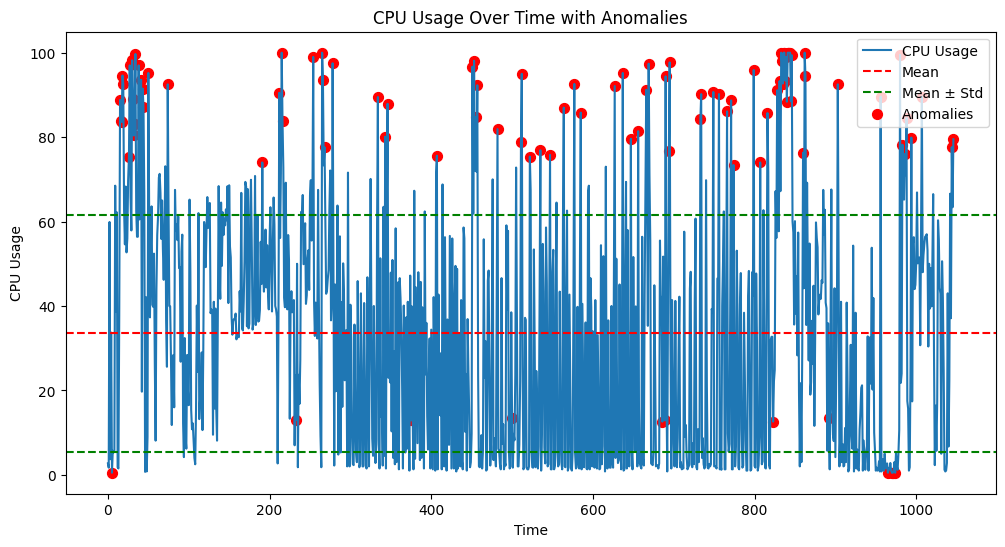

In [13]:
cpu_data = np.array(cpu_data)
cpu_std = cpu_data.std()
cpu_mean = cpu_data.mean()
cpu_anomalies = isolation_forest_anomalies(cpu_data)

print(f"CPU Mean: {cpu_mean}")
print(f"CPU Std: {cpu_std}")

plt.figure(figsize=(12, 6))
plt.plot(cpu_data, label='CPU Usage')
plt.axhline(cpu_mean, color='r', linestyle='--', label='Mean')
plt.axhline(cpu_mean + cpu_std, color='g', linestyle='--', label='Mean ± Std')
plt.axhline(cpu_mean - cpu_std, color='g', linestyle='--')
plt.scatter(cpu_anomalies, cpu_data[cpu_anomalies], color='red', s=50, label='Anomalies')
plt.title('CPU Usage Over Time with Anomalies')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.legend()
plt.show()

RAM Mean: 83.06867239732568
RAM Std: 4.151011942609996


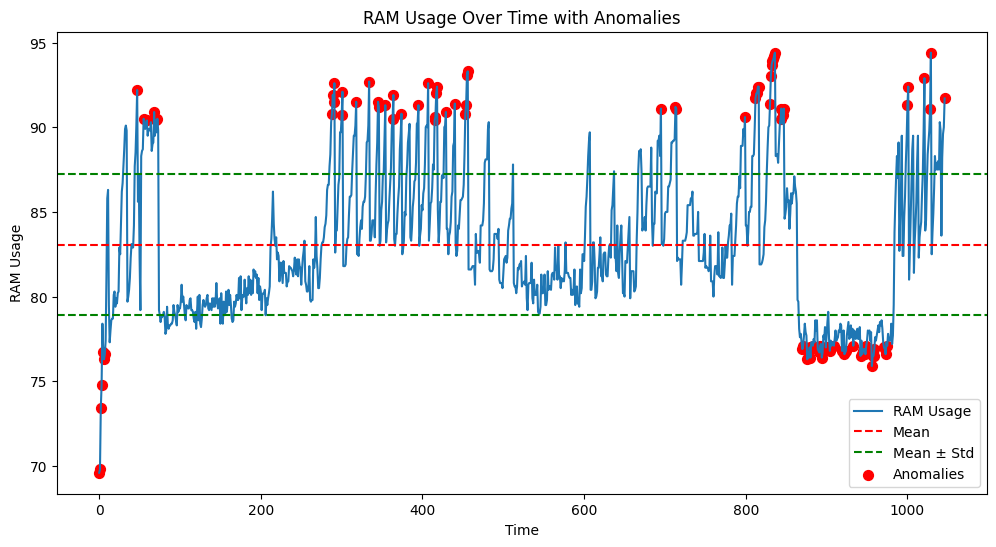

In [14]:
ram_data = np.array(ram_data)
ram_std = ram_data.std()
ram_mean = ram_data.mean()
ram_anomalies = isolation_forest_anomalies(ram_data)

print(f"RAM Mean: {ram_mean}")
print(f"RAM Std: {ram_std}")

plt.figure(figsize=(12, 6))
plt.plot(ram_data, label='RAM Usage')
plt.axhline(ram_mean, color='r', linestyle='--', label='Mean')
plt.axhline(ram_mean + ram_std, color='g', linestyle='--', label='Mean ± Std')
plt.axhline(ram_mean - ram_std, color='g', linestyle='--')
plt.scatter(ram_anomalies, ram_data[ram_anomalies], color='red', s=50, label='Anomalies')
plt.title('RAM Usage Over Time with Anomalies')
plt.xlabel('Time')
plt.ylabel('RAM Usage')
plt.legend()
plt.show()